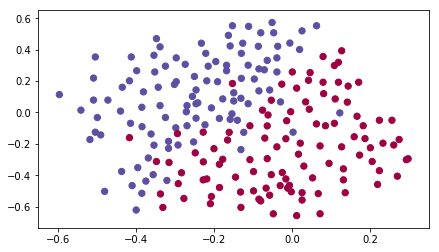

cost after iteration 0: 0.6910175809916411


c:\python35\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
c:\python35\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


cost after iteration 10000: 0.03439047899008471
cost after iteration 20000: 0.17791710946870815


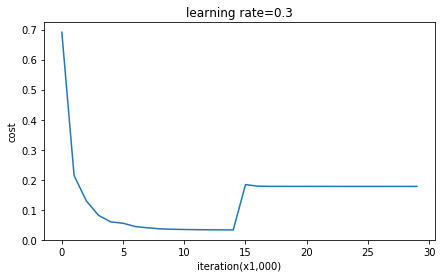

accuracy:0.890995260664
accuracy:0.88
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1
  0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1
  0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1
  1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0
  0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
  0 1 1 0 1 0 0 1 1 1 0 0 0 0 1]]


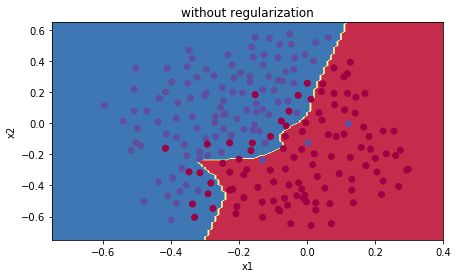

In [7]:
import sklearn
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def load_2D_dataset():
    data = scipy.io.loadmat('E://project//data/2-1-regularization-data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T
    plt.scatter(train_X[0,:],train_X[1,:],c=train_Y,s=40,cmap=plt.cm.Spectral)
    plt.show()
    return train_X, train_Y, test_X, test_Y

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def compute_loss(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y)+np.multiply(-np.log(1-a3),1-Y)
    loss = 1./m*np.nansum(logprobs)
    return loss

def compute_loss_with_regularization(a3,Y,params,lambd):
    m = Y.shape[1]
    W1 = params['W1']
    W2 = params['W2']
    W3 = params['W3']
    
    cross_entropy_cost = compute_loss(a3,Y)
    L2_regularization_cost = (1./m*lambd/2)*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))
    cost = cross_entropy_cost+L2_regularization_cost
    return cost
    
def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    z1 = np.dot(W1,X)+b1
    a1 = relu(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3,a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1,a1,W1,b1,z2,a2,W2,b2,z3,a3,W3,b3)
    return a3, cache

def forward_propagation_with_dropout(X,parameters,keep_prob=0.5):
    np.random.seed(1)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    z1 = np.dot(W1,X)+b1
    a1 = relu(z1)
    D1 = np.random.rand(a1.shape[0],a1.shape[1])
    D1 = D1<keep_prob
    a1 = a1*D1
    a1 = a1/keep_prob
    
    z2 = np.dot(W2,a1) + b2
    a2 = relu(z2)
    D2 = np.random.rand(a2.shape[0],a2.shape[1])
    D2 = D2<keep_prob
    a2 = a2*D2
    a2 = a2/keep_prob
    
    z3 = np.dot(W3,a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1,D1,a1,W1,b1,z2,D2,a2,W2,b2,z3,a3,W3,b3)
    return a3, cache

def backward_propagation(X,Y,cache):
    m = X.shape[1]
    (z1,a1,W1,b1,z2,a2,W2,b2,z3,a3,W3,b3) = cache
    
    dz3 = 1./m*(a3-Y)
    dW3 = np.dot(dz3,a2.T)
    db3 = np.sum(dz3, axis=1,keepdims=True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2,np.int64(a2>0))
    dW2 = np.dot(dz2,a1.T)
    db2 = np.sum(dz2,axis=1,keepdims=True)
    
    da1 = np.dot(W2.T,dz2)
    dz1 = np.multiply(da1,np.int64(a1>0))
    dW1 = np.dot(dz1,X.T)
    db1 = np.sum(dz1,axis=1,keepdims=True)
    
    grads = {"dz3":dz3,"dW3":dW3,"db3":db3,
            "da2":da2,"dz2":dz2,"dW2":dW2,"db2":db2,
            "da1":da1,"dz1":dz1,"dW1":dW1,"db1":db1}
    return grads

def backward_propagation_with_regularization(X,Y,cache,lambd):
    m = X.shape[1]
    (z1,a1,W1,b1,z2,a2,W2,b2,z3,a3,W3,b3) = cache
    
    dz3 = a3-Y
    dW3 = 1./m*np.dot(dz3,a2.T)+lambd/m*W3
    db3 = 1./m*np.sum(dz3, axis=1,keepdims=True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2,np.int64(a2>0))
    dW2 = 1./m*np.dot(dz2,a1.T)+lambd/m*W2
    db2 = 1./m*np.sum(dz2,axis=1,keepdims=True)
    
    da1 = np.dot(W2.T,dz2)
    dz1 = np.multiply(da1,np.int64(a1>0))
    dW1 = 1./m*np.dot(dz1,X.T)+lambd/m*W1
    db1 = 1./m*np.sum(dz1,axis=1,keepdims=True)
    
    grads = {"dz3":dz3,"dW3":dW3,"db3":db3,
            "da2":da2,"dz2":dz2,"dW2":dW2,"db2":db2,
            "da1":da1,"dz1":dz1,"dW1":dW1,"db1":db1}
    return grads

def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    m = X.shape[1]
    (z1,D1,a1,W1,b1,z2,D2,a2,W2,b2,z3,a3,W3,b3) = cache
    
    dz3 = a3-Y
    dW3 = 1./m*np.dot(dz3,a2.T)
    db3 = 1./m*np.sum(dz3, axis=1,keepdims=True)
    
    da2 = np.dot(W3.T, dz3)
    da2 = da2*D2
    da2 = da2/keep_prob
    dz2 = np.multiply(da2,np.int64(a2>0))
    dW2 = 1./m*np.dot(dz2,a1.T)
    db2 = 1./m*np.sum(dz2,axis=1,keepdims=True)
    
    da1 = np.dot(W2.T,dz2)
    da1 = da1*D1
    da1 = da1/keep_prob
    dz1 = np.multiply(da1,np.int64(a1>0))
    dW1 = 1./m*np.dot(dz1,X.T)
    db1 = 1./m*np.sum(dz1,axis=1,keepdims=True)
    
    grads = {"dz3":dz3,"dW3":dW3,"db3":db3,
            "da2":da2,"dz2":dz2,"dW2":dW2,"db2":db2,
            "da1":da1,"dz1":dz1,"dW1":dW1,"db1":db1}
    return grads

def update_params(params, grads, learning_rate):
    L = len(params)//2
    for k in range(L):
        params["W"+str(k+1)]=params["W"+str(k+1)]-learning_rate*grads["dW"+str(k+1)]
        params["b"+str(k+1)]=params["b"+str(k+1)]-learning_rate*grads["db"+str(k+1)]
    return params

def predict(X,y,params):
    m = X.shape[1]
    p = np.zeros((1,m),dtype=np.int)
    a3,caches = forward_propagation(X, params)
    for i in range(0,a3.shape[1]):
        if a3[0,i]>0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("accuracy:"+str(np.mean((p[0,:]==y[0,:]))))
    return p

def plot_decision_boundary(model, X, y):
    x_min,x_max = X[0,:].min()-1,X[0,:].max()+1
    y_min,y_max = X[1,:].min()-1,X[1,:].max()+1
    h = 0.01
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z = model(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0,:],X[1,:],c=y,cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(params, X):
    a3, cache = forward_propagation(X, params)
    predictions = (a3>0.5)
    return predictions

def model(X,Y,learning_rate,num_iter,print_cost,lambd,keep_prob):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]

    params = init_params(layers_dims)
        
    for i in range(0, num_iter):
        if keep_prob == 1:
            a3,cache = forward_propagation(X,params)
        elif keep_prob<1:
            a3,cache = forward_propagation_with_dropout(X, params, keep_prob)
        
        if lambd == 0:
            cost = compute_loss(a3, Y)
        else:
            cost = compute_loss_with_regularization(a3,Y,params,lambd)
            
        if lambd==0 and keep_prob==1:
            grads = backward_propagation(X,Y, cache)
        elif lambd!=0:
            grads=backward_propagation_with_regularization(X,Y,cache,lambd)
        elif keep_prob<1:
            grads=backward_propagation_with_dropout(X,Y,cache,keep_prob)
        
        params = update_params(params,grads,learning_rate)
        if print_cost and i%10000==0:
            print("cost after iteration {0}: {1}".format(i,cost))
        if print_cost and i%1000==0:
            costs.append(cost)
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iteration(x1,000)')
    plt.title('learning rate='+str(learning_rate))
    plt.show()
    return params

def init_params(layers_dims):
    params = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        params['W'+str(l)]=np.random.randn(layers_dims[l],layers_dims[l-1])/np.sqrt(layers_dims[l-1])
        params['b'+str(l)]=np.zeros((layers_dims[l],1))
    return params
    
if __name__ == '__main__':
    train_X, train_Y, test_X, test_Y = load_2D_dataset()
    params = model(train_X,train_Y,0.3,30000,True,lambd=0,keep_prob=0.86)
    prediction_train = predict(train_X,train_Y,params)
    prediction_test = predict(test_X,test_Y,params)
    print(prediction_train)
    print(prediction_test)
    plt.title("without regularization")
    axes = plt.gca()
    axes.set_xlim([-0.75,0.40])
    axes.set_ylim([-0.75,0.65])
    plot_decision_boundary(lambda x:predict_dec(params, x.T), train_X, train_Y)